# Прогноз проницаемости образцов горной породы по петрофизическим свойствам методами машинного обучения.

Решение отправляется в виде `ZIP`-файла, в котором должны находиться: 

- 1 Notebook-файл
- 1 CSV с ответами.

Эти файлы будут проходить проверку.

ВАЖНО СОБЛЮСТИ СЛЕДУЮЩИЕ УСЛОВИЯ!

1. Имена файлов и `ZIP`-архива НЕ ДОЛЖНЫ содержать киррилицу.

2. `ZIP`-архив обязательно должен содержать **1 файл CSV** и **1 файл Jupyter Notebook**.

3. Колонка с ответами в `CSV` файле должна состоять из чисел. Допускаются целые числа и числа с плавающей точкой. Поддерживается запись числа в экспоненциальном виде (например, `1.016441e+03`).

4. Дополнительные требования указаны в **Baseline-ноутбуке**.

В случае каких-либо ошибок при загрузке/проверке Вашего решения - попытка не будет засчитана и можно будет отправить решение ещё раз (исправив причину ошибки в загружаемых файлах).

## Задача

Необходимо разработать методику для прогноза проницаемости образцов горной породы по их петрофизическим свойствам методами машинного обучения.
Входными признаками являются: 
<ol>
<li>Общая пористость образца ($\Phi$) - это доля объёма порового пространства в общем объёме горного образца.
<li>Профиль пористости образца вдоль оси Z ($\phi_z$) - локальная пористость горного образца замеренная вдоль оси Z, она показывает степень однородности породы по направлению оси Z.
</ol>

Целевая функция:

Абсолютная проницаемость вдоль оси Z ($k_z$)- это величина, характеризующая способность горного образца пропускать жидкость (или газ) при перепаде давления, типичная размерность мД (миллидарси). Чем это значение выше, тем лучше образец пропускает жидкость.

In [107]:
import numpy as np
import matplotlib.pyplot as plt

1. Загрузка **общей пористости образцов** ($\Phi$, porosity):

In [108]:
porosity=np.genfromtxt('porosity.csv',invalid_raise=False,comments='#',delimiter=',')
print('Количество образцов в обучающей выборке: ',np.size(porosity))

Количество образцов в обучающей выборке:  100


2. Загрузка **профиля пористости образца вдоль оси Z** ($\phi_z$, porosityProfile):

In [109]:
porosityProfile=np.genfromtxt('porosityProfile.csv',invalid_raise=False,comments='#',delimiter=',')

In [110]:
porosityProfile.shape

(100, 200)

Профиль пористости был замерен с интервалом 5 мкм.

3. Загрузка абсолютной проницаемости вдоль оси Z ($k_z$, permeabilityZ): $Y$

In [9]:
permeabilityZ=np.genfromtxt('permeabilityZ.csv',invalid_raise=False,comments='#',delimiter=',')

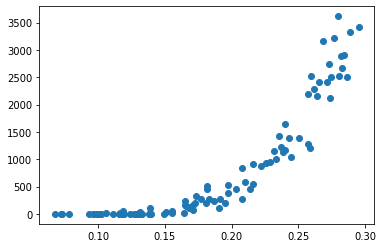

In [14]:
plt.scatter(porosity, permeabilityZ)

In [128]:
from sklearn.linear_model import TweedieRegressor

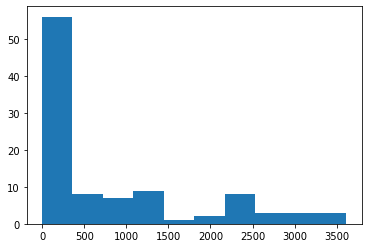

In [132]:
plt.hist(Y)
plt.show()

In [ ]:
X = [[0, 0], [0, 1], [2, 2]]

In [129]:
plt.scatter([[0, 0], [0, 1], [2, 2]])

TypeError: scatter() missing 1 required positional argument: 'y'

In [ ]:
reg.fit(, [0, 1, 2])

In [23]:
import pandas as pd

In [41]:
columns = ['porosity'] + [f'k_{z}' for z in range(1, 201)] + ['Y']

In [43]:
data = pd.DataFrame(data=np.concatenate((porosity.reshape(-1, 1), porosityProfile, permeabilityZ.reshape(-1, 1)), axis=1), 
             columns=columns)

In [99]:
data2 = pd.DataFrame(data=np.concatenate((porosity.reshape(-1, 1), 
                                          porosityProfile.mean(axis=1).reshape(-1, 1), 
                                          permeabilityZ.reshape(-1, 1)), axis=1), 
             columns=['porosity', 'mean', 'Y'])

In [101]:
data2.corr()

,porosity,mean,Y
porosity,1.00000,1.00000,0.87296
mean,1.00000,1.00000,0.87296
Y,0.87296,0.87296,1.00000


In [55]:
Y_corr = abs(data.corr())['Y']
Y_corr.shape

(202,)

In [60]:
Y_corr[Y_corr > 0.71]

porosity    0.872960
k_1         0.714721
k_2         0.716723
k_3         0.718428
k_4         0.723757
              ...   
k_197       0.812183
k_198       0.799739
k_199       0.791805
k_200       0.787216
Y           1.000000
Name: Y, Length: 202, dtype: float64

In [69]:
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

In [133]:
y = data2['Y'].values
X = data2.iloc[:, 0].values.reshape(-1,1)

In [175]:
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mea
cv = ShuffleSplit(n_splits=10, test_size=0.2)
cv = KFold(n_splits=10, shuffle=True)

In [177]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)) / np.abs(y_pred))

In [ ]:
1, 0.09

In [201]:
for i in range(5):
    r2 = []
    mae = []
    mse = []
    mape = []
    classifiers = []
    for train_index, test_index in cv.split(X):
        cl = TweedieRegressor(power=1.5, alpha=0.01, link='log')
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        cl.fit(X_train, y_train)
        r2.append(r2_score(y_true=y_test, 
                           y_pred=cl.predict(X_test)))
        mse.append(mean_squared_error(y_true=y_test, 
                           y_pred=cl.predict(X_test)))
        mae.append(mean_absolute_error(y_true=y_test, 
                           y_pred=cl.predict(X_test)))
        mape.append(MAPE(y_true=y_test, 
                           y_pred=cl.predict(X_test)))

        # получим 5 оптимальных классификаторов
        classifiers.append(cl)
    print(f'iteration {i}, R2: {np.mean(r2)}, MAE: {np.mean(mae)}, MSE: {np.mean(mse)}, MAPE: {np.mean(mape)}')
# res = []
# for c in classifiers:
#     res.append(c.predict(X_test))
# dat = pd.DataFrame(np.array(res).T)
# dat.mean(axis=1).to_csv('answer.csv', index=False, header=0)

iteration 0, R2: 0.9085327433377204, MAE: 181.16439498953866, MSE: 85764.57225906082, MAPE: 0.5202262670033339
iteration 1, R2: 0.9002029283900297, MAE: 181.6652347095253, MSE: 84299.73945541392, MAPE: 0.5206966327209611
iteration 2, R2: 0.9073878224410065, MAE: 179.16404185207648, MSE: 80871.38202179813, MAPE: 0.5196743581109231
iteration 3, R2: 0.9165934205762871, MAE: 179.6417940061927, MSE: 82224.10535315663, MAPE: 0.51874694260361
iteration 4, R2: 0.913676647338822, MAE: 179.24458646500858, MSE: 84775.35207655435, MAPE: 0.5200558093600391


In [143]:
cl.intercept_

2.537950810351938

## Test

In [20]:
test_porosity=np.genfromtxt('test_porosity.csv',invalid_raise=False,comments='#',delimiter=',')
print('Количество образцов в тестовой выборке: ',np.size(test_porosity))
test_porosityProfile=np.genfromtxt('test_porosityProfile.csv',invalid_raise=False,comments='#',delimiter=',')

Количество образцов в тестовой выборке:  100


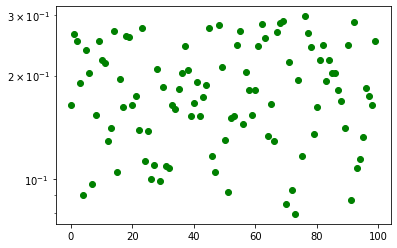

In [124]:
plt.semilogy(test_porosity,'go', label="тестовая выборка")

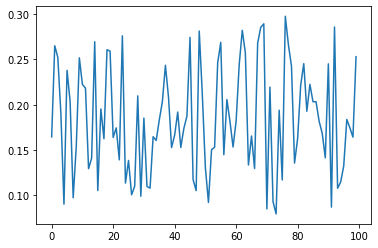

In [125]:
plt.plot(test_porosity)

In [127]:
plt.semilogy?

In [21]:
test_porosityProfile

array([[0.252725, 0.249475, 0.2434  , ..., 0.2511  , 0.259375, 0.262825],
       [0.299225, 0.295   , 0.2882  , ..., 0.356475, 0.359575, 0.36155 ],
       [0.293625, 0.2896  , 0.280725, ..., 0.30975 , 0.31755 , 0.321125],
       ...,
       [0.264425, 0.258425, 0.24795 , ..., 0.221175, 0.226675, 0.230225],
       [0.254975, 0.252   , 0.245525, ..., 0.2948  , 0.308025, 0.314925],
       [0.3153  , 0.31235 , 0.305125, ..., 0.3001  , 0.3083  , 0.3132  ]])

In [104]:
test_porosity

array([0.164427  , 0.26515512, 0.25233437, 0.1899045 , 0.09009388,
       0.23796063, 0.20357675, 0.097159  , 0.15410213, 0.25182775,
       0.22243937, 0.21819712, 0.129346  , 0.14090137, 0.269623  ,
       0.10516012, 0.19527987, 0.1623595 , 0.26078163, 0.25915888,
       0.16385688, 0.17438163, 0.13904037, 0.27614163, 0.11335188,
       0.1383935 , 0.1004125 , 0.10988425, 0.20980075, 0.09883037,
       0.18519737, 0.10962038, 0.10778225, 0.16458575, 0.1604965 ,
       0.18302413, 0.203127  , 0.24355625, 0.20848638, 0.15264575,
       0.16626825, 0.1918585 , 0.152746  , 0.17386062, 0.18740725,
       0.27447025, 0.117114  , 0.10508763, 0.2814415 , 0.21147313,
       0.13020913, 0.0919655 , 0.15026862, 0.15299675, 0.2463005 ,
       0.268921  , 0.14474662, 0.20570763, 0.1813715 , 0.15329   ,
       0.18200163, 0.24424513, 0.28226175, 0.25727975, 0.13339287,
       0.16543912, 0.12947538, 0.26796863, 0.28550338, 0.28941662,
       0.08485112, 0.21943925, 0.09283962, 0.07929   , 0.19392

In [106]:
test_porosityProfile.mean(axis=1)

array([0.164427  , 0.26515512, 0.25233437, 0.1899045 , 0.09009388,
       0.23796062, 0.20357675, 0.097159  , 0.15410213, 0.25182775,
       0.22243937, 0.21819713, 0.129346  , 0.14090137, 0.269623  ,
       0.10516013, 0.19527988, 0.1623595 , 0.26078163, 0.25915888,
       0.16385687, 0.17438163, 0.13904037, 0.27614163, 0.11335188,
       0.1383935 , 0.1004125 , 0.10988425, 0.20980075, 0.09883037,
       0.18519737, 0.10962037, 0.10778225, 0.16458575, 0.1604965 ,
       0.18302412, 0.203127  , 0.24355625, 0.20848638, 0.15264575,
       0.16626825, 0.1918585 , 0.152746  , 0.17386063, 0.18740725,
       0.27447025, 0.117114  , 0.10508762, 0.2814415 , 0.21147312,
       0.13020913, 0.0919655 , 0.15026863, 0.15299675, 0.2463005 ,
       0.268921  , 0.14474662, 0.20570763, 0.1813715 , 0.15329   ,
       0.18200162, 0.24424512, 0.28226175, 0.25727975, 0.13339287,
       0.16543913, 0.12947538, 0.26796863, 0.28550338, 0.28941662,
       0.08485112, 0.21943925, 0.09283962, 0.07929   , 0.19392